In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### My notebook Imports

In [4]:
import sys 
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram')
sys.path.append('C:\\Users\\Eesh Gupta\\Documents\\RU Research\\Chakram\\ECD_control')
#end

In [5]:
import numpy as np
import qutip as qt 
from ECD_control.ECD_optimization.batch_optimizer import BatchOptimizer
from ECD_control.ECD_optimization.optimization_analysis import OptimizationAnalysis, OptimizationSweepsAnalysis
from ECD_control.ECD_pulse_construction.ECD_pulse_construction import *
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0


Need tf version 2.3.0 or later. Using tensorflow version: 2.7.0



[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4221704488449355837
 xla_global_id: -1]

In [6]:
#The target oscillator state.
N =40
Fock = 3
psi_t = qt.basis(N,3) #target state

In [7]:
#Optimization of ECD Circuit parameters (betas, phis, and thetas)
#the optimization options
opt_params = {
'N_blocks' : 7, #circuit depth
'N_multistart' : 200, #Batch size (number of circuit optimizations to run in parallel)
'epochs' : 200, #number of epochs before termination
'epoch_size' : 10, #number of adam steps per epoch
'learning_rate' : 0.01, #adam learning rate
'term_fid' : 0.995, #terminal fidelitiy
'dfid_stop' : 1e-6, #stop if dfid between two epochs is smaller than this number
'beta_scale' : 3.0, #maximum |beta| for random initialization
'initial_states' : [qt.tensor(qt.basis(2,0),qt.basis(N,0))], #qubit tensor oscillator, start in |g> |0>
'target_states' : [qt.tensor(qt.basis(2,1), psi_t)], #end in |e> |target>.
'name' : 'Fock %d' % Fock, #name for printing and saving
'filename' : None, #if no filename specified, results will be saved in this folder under 'name.h5'
}
#note: optimizer includes pi pulse in every ECD step. However, final ECD step is implemented 
#in experiment as a displacement since the qubit and oscillator should be disentangled at this point.
#So, we ask the optimizer to end in |e> |target> instead of |g>|target>.

In [8]:
#create optimization object. 
#initial params will be randomized upon creation
opt = BatchOptimizer(**opt_params)

#print optimization info. 
opt.print_info()

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [-0.56364-0.45225j  1.44197-1.86869j  0.40984+0.08186j  1.48848+1.44776j
 -2.42821-0.47235j -1.06116+2.73334j  1.90526-0.41006j]
alphas:        [0.+0.j]
phis (deg):    [   0.      -141.46188  158.2723    12.1099    15.39422  -34.99072
  155.6139 ]
thetas (deg):  [-40.19329 -45.16307 -16.35781 -22.35864 144.28839 176.9413  -12.36271]
Max Fidelity:  0.177014




In [9]:
#run optimizer.
opt.optimize()

Start time: 2022-01-14 13:58:44
 Epoch: 23 / 200 Max Fid: 0.995350 Avg Fid: 0.848399 Max dFid: 0.119568 Avg dFid: 0.005907 Elapsed time: 0:08:08.279919 Remaing time: 1:02:37.632418

 Optimization stopped. Term fidelity reached.

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 1.15187+1.02052j -0.36605+1.49638j  0.2148 +1.35806j  0.60905-0.14679j
  0.9084 +1.02905j -0.04849+0.40771j -0.00146+0.00165j]
alphas:        [0.+0.j]
phis (deg):    [  0.       90.18616  89.94991  89.99847 -90.2212  -89.8107  179.7595 ]
thetas (deg):  [  89.86497  -81.08537 -100.85992  -47.44632  134.78094   92.57954
  -89.98881]
Max Fidelity:  0.995412


all data saved as: Fock 3.h5
termination re

'2022-01-14 13:58:44'

In [10]:
#can print info, including the best circuit found.
opt.print_info() 

optimization_type: state transfer
N_multistart: 200
N_blocks: 7
term_fid: 0.995
dfid_stop: 1e-06
no_CD_end: False
learning_rate: 0.01
epoch_size: 10
epochs: 200
beta_scale: 3.0
alpha_scale: 1.0
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
name: Fock 3
comment: 
N_cav: 40
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 1.15187+1.02052j -0.36605+1.49638j  0.2148 +1.35806j  0.60905-0.14679j
  0.9084 +1.02905j -0.04849+0.40771j -0.00146+0.00165j]
alphas:        [0.+0.j]
phis (deg):    [  0.       90.18616  89.94991  89.99847 -90.2212  -89.8107  179.7595 ]
thetas (deg):  [  89.86497  -81.08537 -100.85992  -47.44632  134.78094   92.57954
  -89.98881]
Max Fidelity:  0.995412




In [11]:
#can also get the best circuit parameters directly, could save this to a .npz file.
best_circuit =  opt.best_circuit()
betas = best_circuit['betas']
phis = best_circuit['phis']
thetas = best_circuit['thetas']
print(best_circuit)

{'fidelity': 0.99541235, 'betas': array([ 1.1518668 +1.0205182j , -0.36604553+1.4963821j ,
        0.21480377+1.3580625j ,  0.60904944-0.14678544j,
        0.9084035 +1.0290475j , -0.04848907+0.40771085j,
       -0.00146185+0.0016506j ], dtype=complex64), 'alphas': array([0.+0.j], dtype=complex64), 'phis': array([ 0.       ,  1.5740454,  1.5699222,  1.5707695, -1.574657 ,
       -1.5674925,  3.1373951], dtype=float32), 'thetas': array([ 1.5684397, -1.4152068, -1.7603378, -0.8280945,  2.3523715,
        1.6158178, -1.5706011], dtype=float32)}


In [12]:
#Analysis of the results. Can load the .h5 file.
#all data is stored as a timestamp in a .h5 file
#You can also specify which timestamp you are analyzing. Be defult, it will use the most recent optimization in the file.
#I  recommend using "HDFview" software to understand data structure
#filename = opt.filename
filename = 'Fock %d.h5' % Fock
analysis = OptimizationAnalysis(filename)
analysis.print_info() #we can print info of best circuit

N_blocks: 7
N_cav: 40
N_multistart: 200
alpha_scale: 1.0
beta_scale: 3.0
comment: 
dfid_stop: 1e-06
elapsed_time_s: 488.2799186706543
epoch_size: 10
epochs: 200
learning_rate: 0.01
name: Fock 3
no_CD_end: False
optimization_type: state transfer
term_fid: 0.995
termination_reason: term_fid
theta_scale: 3.141592653589793
use_displacements: False
use_phase: False
filename: Fock 3.h5

Best circuit parameters found:
betas:         [ 1.15187+1.02052j -0.36605+1.49638j  0.2148 +1.35806j  0.60905-0.14679j
  0.9084 +1.02905j -0.04849+0.40771j -0.00146+0.00165j]
alphas:        [0.+0.j]
phis (deg):    [  0.       90.18616  89.94991  89.99847 -90.2212  -89.8107  179.7595 ]
thetas (deg):  [  89.86497  -81.08537 -100.85992  -47.44632  134.78094   92.57954
  -89.98881]
Max Fidelity:  0.995350




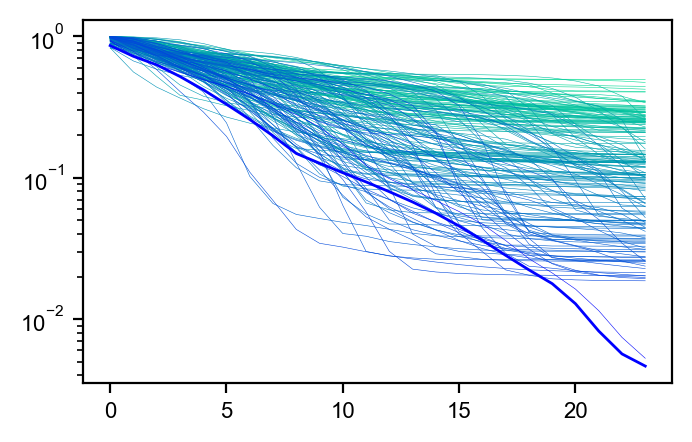

In [13]:
#We can plot the fidelities of the different parallel optimizations. 
# x axis is epoch
analysis.plot_fidelities()

In [14]:
#Now, we can take the parameters found (betas, phis, and thetas)
#and use them to produce a ECD oscillator and qubit pulse.
#This requies us to specify the calibrated experimental parameters.

#The following parameters for the oscillator will be used to build the oscillator pulse.
#Here, assume that a gaussian displacement pulse to alpha=1.0 has been calibrated.
storage_params = {
        "chi_kHz": -33, #dispersive shift
        "chi_prime_Hz": -1, #second order dispersive shift
        "Ks_Hz": 0, #Kerr correction not implemented here.
        "unit_amp": 0.01, #DAC amplitude (at maximum of pulse) for gaussian displacement to alpha=1.
        "sigma": 11, #oscillator displacement pulse sigma
        "chop": 4, #oscillator displacement pulse chop (number of sigmas to include in gaussian pulse)
    }

#In a similar way, the qubit pulse parameters will be specified by a calibrated pi pulse.
#unit_amp is the DAC amplitude (at maximum of pulse) for a calibrated gaussian pi pulse, with sigma and chop specified
qubit_params = {'unit_amp': 0.5, 'sigma': 6, 'chop': 4} #parameters for qubit pi pulse.


#creating the "Fake storage" and "Fake qubit" objects which are used
#for pulse cration
storage = FakeStorage(**storage_params)
qubit = FakeQubit(**qubit_params)

#The maximum displacement used during the ECD gates.
alpha_CD = 30
#Small delay to insert between oscillator and qubit pulses to ensure timing is okay.
buffer_time = 4

In [15]:
#From these calibrations, the storage and qubit objects calculate the
#conversion between DAC amplitude, and drive amplitude in MHz.
#so, [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz 
#and [Omega(t) in MHz] = [Omega(t) in DAC units]*Omega_m_MHz.
#These parameters also represent the maximum drive amplitude,
#since the DAC max amplitude is 1 (assuming amplifiers don't saturate.)
print('Maximum oscillator drive amplitude: |epsilon|/2*pi < %.3f MHz' % storage.epsilon_m_MHz)
print('Maximum qubit drive amplitude: |Omega|/2*pi < %.3f MHz' % qubit.Omega_m_MHz)

Maximum oscillator drive amplitude: |epsilon|/2*pi < 690.790 MHz
Maximum qubit drive amplitude: |Omega|/2*pi < 40.468 MHz


In [16]:
#generating the oscillator and qubit pulses (epsilon and Omega)
#set 'chi_prime_correction = True' to correct for linear part of chi'
#final_disp = True will implement final ECD gate as a gaussian displacement instead of full ECD gate.
#This option is useful if the qubit and oscillator are disentangled after the gate.
pulse_dict = conditional_displacement_circuit(betas, phis, thetas, storage, qubit,
                     alpha_CD,buffer_time=buffer_time, kerr_correction = False, chi_prime_correction=True, final_disp=True, pad=True)

#The dictionary will contain the pulses, in DAC units.
#Also, the displacements used for each ECD gate (the "alphas")
cavity_dac_pulse, qubit_dac_pulse,alphas = pulse_dict['cavity_dac_pulse'], pulse_dict['qubit_dac_pulse'], pulse_dict['alphas']
print('alphas:')
print(alphas)

C:\Users\Eesh Gupta\anaconda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


alphas:
[30.0, 30.041822232644428, 30.164439999454324, 30.0, 30.11382628064091, 21.54581887342382]


Text(0.5, 0, 'ns')

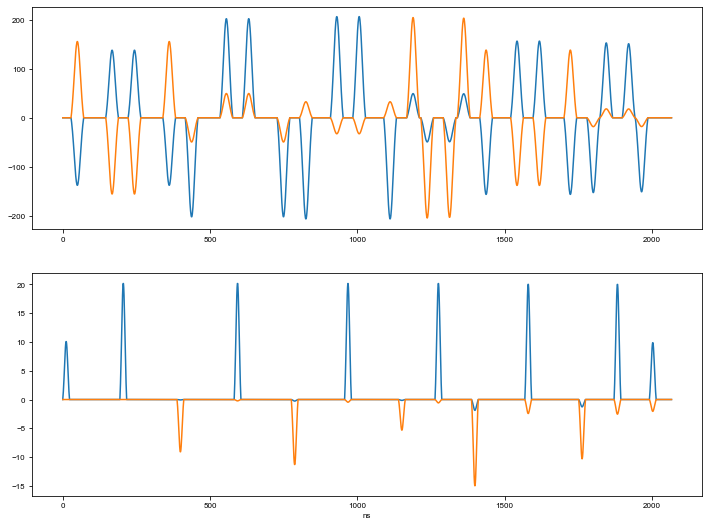

In [17]:
#plotting the pulse, in units of MHz. It could also be fed into a time-domain simulation.
fig, axs = plt.subplots(2,1)
axs[0].plot(np.real(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[0].plot(np.imag(storage.epsilon_m_MHz*cavity_dac_pulse))
axs[1].plot(np.real(qubit.Omega_m_MHz*qubit_dac_pulse))
axs[1].plot(np.imag(qubit.Omega_m_MHz*qubit_dac_pulse))
plt.xlabel('ns')

# Layer of Qutip

In [19]:
from qutip import *
from qutip.control import *
from math import *

In [18]:
#changing units of pulses

cavity_dac_pulse_GHz = 10**(-3)*storage.epsilon_m_MHz*cavity_dac_pulse #convert from DAC to Mhz to Ghz
qubit_dac_pulse_GHz = 10**(-3)*qubit.Omega_m_MHz*qubit_dac_pulse #convert from DAC to Mhz to Ghz

In [20]:
T = len(cavity_dac_pulse)
times = np.linspace(0, T, T) #1ns timesteps

#### System Hamiltonian

In [21]:
n_c = 40  #number of levels in cavity
n_q = 2 #number of levels in qubit


omega_c  = 4.5 *2*pi   #frequencies in GHz
omega_q = 5.66*2*pi
#K = -3.7*(10**(-6))*2*pi #cavity nonlinearity

#photon depenedent number shifts in GHz
chi = storage_params["chi_kHz"]*(10**(-6)) #linear
chi_ = storage_params["chi_prime_Hz"]*(10**(-9)) #quadratic

In [22]:
# Creating identity, annhilitation/creation, num operators 
identity = tensor(qeye(n_q), qeye(n_c))

a_q = tensor(destroy(n_q), qeye(n_c))
a_c = tensor(qeye(n_q),destroy(n_c))

adag_q = tensor(create(n_q), qeye(n_c))
adag_c = tensor(qeye(n_q),create(n_c))

num_q = tensor(num(n_q), qeye(n_c))
num_c = tensor(qeye(n_q), num(n_c))

#qubit
H_q = omega_q*num_q #+ (omega_q/2)*adag_q*adag_q*a_q*a_q
#cavity
H_c = omega_c*num_c #+ (K/2)*adag_c*adag_c*a_c*a_c
#interaction
H_int= chi*num_q*num_c + (chi_/2)*adag_q*adag_q*a_q*a_q*num_c


#full hammy without drive
H_0 = H_q + H_c + H_int

c_ops = []


In [26]:
# expectation values to measure (populations of various fock states)
e_ops = []
for i in range(n_c):
    target = tensor(basis(n_q,0), basis(n_c, i))
    op = target*target.dag()
    e_ops.append(op)

##### Preparing Drive Pulses for Qutip time evolution

In [23]:
from qutip.interpolate import Cubic_Spline 
cavity_imag_spline = Cubic_Spline(0, T, np.imag(cavity_dac_pulse_GHz))
cavity_real_spline = Cubic_Spline(0, T, np.real(cavity_dac_pulse_GHz))
qubit_imag_spline =Cubic_Spline(0, T, np.imag(qubit_dac_pulse_GHz))
qubit_real_spline = Cubic_Spline(0, T, np.real(qubit_dac_pulse_GHz))

def cavity_imag(t, args):
    S = cavity_imag_spline
    return S(t)* np.cos(omega_c*t)
def cavity_real(t, args):
    S = cavity_real_spline
    return S(t)* np.cos(omega_c*t)
def qubit_imag(t, args):
    S = qubit_imag_spline
    return S(t)* np.cos(omega_q*t)
def qubit_real(t, args):
    S = qubit_real_spline
    return S(t)* np.cos(omega_q*t)

In [24]:
H = [H_0,
    [a_q, qubit_imag], 
     [adag_q, qubit_real], 
     [a_c, cavity_imag],
     [adag_c, cavity_real]
    ]

In [31]:
# Time evolution
psi0 = tensor(basis(n_q,0), basis(n_c,0))
opts = Options(store_states=True, store_final_state=True, nsteps = 10000)
output = mesolve(H, psi0 , times, c_ops, e_ops, options =opts)
rho = output.states[-1]

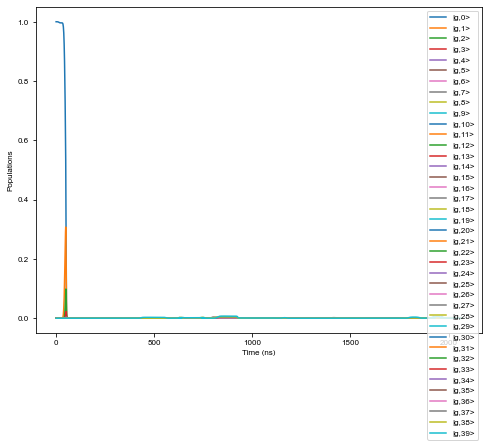

In [34]:
# All fock states
fig = plt.figure(figsize=(8,6))

for i in range(n_c):
    plt.plot(times, output.expect[i], label = '|g,'+str(i)+'>')

plt.xlabel("Time (ns)")
plt.ylabel("Populations")
plt.legend(prop={'size': 12}, loc=2)   
plt.legend()

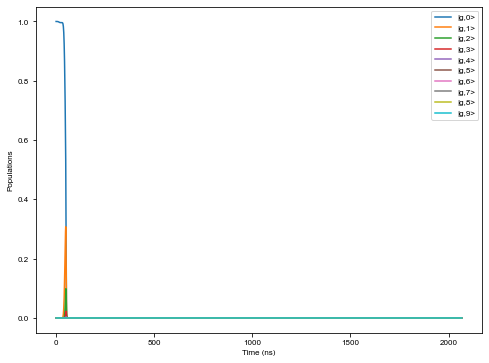

In [35]:
# First 10 states
fig = plt.figure(figsize=(8,6))

for i in range(10):
    plt.plot(times, output.expect[i], label = '|g,'+str(i)+'>')

plt.xlabel("Time (ns)")
plt.ylabel("Populations")
plt.legend(prop={'size': 12}, loc=2)   
plt.legend()

### Problem: Why doesn't |g,3> come out on top

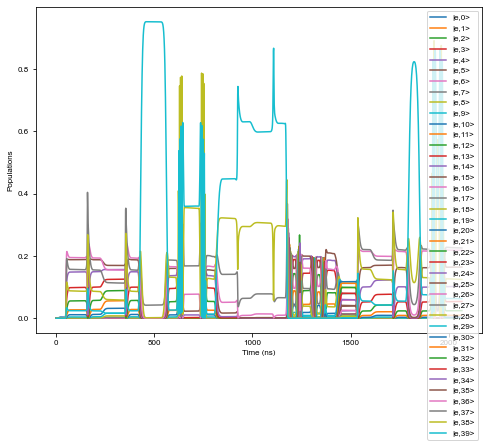

In [36]:
# looking at |e, ...> states 
fig = plt.figure(figsize=(8,6))
probs = []
times = [k for k in range(len(output.states))]

for i in range(n_c):
    target = tensor(basis(n_q,1), basis(n_c, i))
    pops = []
    for k in range(len(output.states)): 
        z = target.overlap(output.states[k])
        pops.append(z.real**2 + z.imag**2)
    plt.plot(times, pops, label = '|e,'+str(i)+'>')
plt.xlabel("Time (ns)")
plt.ylabel("Populations")
plt.legend(prop={'size': 12}, loc=2)   
plt.legend()